In [56]:
import pandas as pd
%matplotlib inline
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import contractions
import string

In [57]:
def clean_text(row):
    all_lyrics_text=row
    
    #Tokenization
    token_all_text=nltk.word_tokenize(all_lyrics_text)
    final_token_text = [word for word in token_all_text if word.isalpha()]
    
    #Expand contractions
    text_no_contract=[contractions.fix(word) for word in final_token_text]
    
    #Remove stop words
    text_no_stp_contract=[word for word in text_no_contract if word.lower() not in stopwords]    
    
    #Lemmatization
    #no_stop_contract_lemma=[]
    #for word in text_no_stp_contract:
        #tag=nltk.pos_tag(word.split(" "))[0][1]
        #pos=get_pos_arg(tag)
        #no_stop_contract_lemma.append(wnetl.lemmatize(word,pos))

    lyrics_text="".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in text_no_stp_contract]).strip()
    return lyrics_text

In [93]:

scrape_df = pd.read_csv("scrape_data3.csv", usecols=np.r_[1:16], low_memory=False, encoding='utf-8', dtype={'Release Genre': str})
scrape_df.index = [x for x in range(1, len(scrape_df.values)+1)]
scrape_df.index.name = 'id'
scrape_df = scrape_df.drop_duplicates(subset = ["Release URL"])
scrape_df.dropna(inplace=True)

scrape_df

#cell_regex=nltk.RegexpTokenizer(pattern=r'\w+', gaps=False)
#cell_regex=nltk.RegexpTokenizer("[\\w']+|[^\\w\\s]+")
cell_regex=nltk.RegexpTokenizer("[\s+]+", gaps=True)
scrape_df['Lyrics Tokens'] = scrape_df['All Lyrics'].apply(cell_regex.tokenize)

#scrape_df= scrape_df.assign(Lyrics_Tokens='')
#for index, row in scrape_df.iterrows():
    #scrape_df.at[index, 'Lyrics Tokens']= clean_text(scrape_df.at[index,'All Lyrics'])
    
scrape_df

,Release Genre,Release Sub-Genre,Search Format,Search Week,Search Category,Release URL,Scrape Date,Release Title,Artist Name,Artist Location,Release Date,Tags,Track Info,All Lyrics,Number of Tracks,Lyrics Tokens
id,,,,,,,,,,,,,,,,
2,all,all,all,this week,top,https://portrayalofguilt.bandcamp.com/album/po...,8/19/2021,portrayal of guilt / Chat Pile Split,portrayal of guilt,"Austin, Texas",8/17/2021,"['punk', 'black metal', 'hardcore', 'metal', '...","[{'Track Title': 'Touched by an Angel', 'Track...","\nMy mind, tortured and depraved.\nDissolving....",2,"[My, mind,, tortured, and, depraved., Dissolvi..."
6,all,all,all,this week,top,https://chatpile.bandcamp.com/album/portrayal-...,8/19/2021,portrayal of guilt / Chat Pile Split,Chat Pile,"Oklahoma City, Oklahoma",8/17/2021,"['death metal', 'hardcore', 'industrial', 'met...",[{'Track Title': 'portrayal of guilt - Touched...,\nThe brutal truth is\nThat I’m just a simian ...,2,"[The, brutal, truth, is, That, I’m, just, a, s..."
14,all,all,all,this week,top,https://wednesdayband.bandcamp.com/album/twin-...,8/19/2021,Twin Plagues,Wednesday,"Asheville, North Carolina",8/13/2021,"['rock', 'country-gaze', 'indie', 'lo-fi', 'sh...","[{'Track Title': 'Twin Plagues', 'Track Lyrics...",\nYou are fearless\nYou defy death\nFlies are ...,12,"[You, are, fearless, You, defy, death, Flies, ..."
23,all,all,all,this week,top,https://bedouine.bandcamp.com/album/waysides-2,8/19/2021,Waysides,Bedouine,"Los Angeles, California",10/15/2021,"['folk', 'indie folk', 'singer-songwriter', 'L...","[{'Track Title': 'The Wave', 'Track Lyrics': '...",\nWell of tomorrows\nFlow over for you\nNot re...,1,"[Well, of, tomorrows, Flow, over, for, you, No..."
25,all,all,all,this week,top,https://linguaignota.bandcamp.com/album/sinner...,8/19/2021,SINNER GET READY,LINGUA IGNOTA,"Chicago, Illinois",8/6/2021,"['experimental', 'retribution', 'Chicago']",[{'Track Title': 'THE ORDER OF SPIRITUAL VIRGI...,\nHIDE YOUR CHILDREN HIDE YOUR HUSBAND \nI AM...,9,"[HIDE, YOUR, CHILDREN, HIDE, YOUR, HUSBAND, I,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,reggae,all,all,3 weeks ago,new,https://mellodose.bandcamp.com/album/heaven-to-me,8/20/2021,Heaven to Me,"Austin Grimm, Sun-Dried Vibes, and Mellodose","Adams, Tennessee",6/25/2021,"['reggae', 'reggae rock', 'roots reggae', 'chi...","[{'Track Title': 'Heaven to Me', 'Track Lyrics...",\nI just wanna be surrounded by trees\nMy frie...,1,"[I, just, wanna, be, surrounded, by, trees, My..."
7852,reggae,all,all,3 weeks ago,new,https://headhunters.bandcamp.com/album/whos-go...,8/20/2021,whos going to volcom,Head Hunters,"Huntington Beach, California",7/18/2021,"['headley', 'reggae', 'Huntington Beach']","[{'Track Title': 'hoonter jam', 'Track Lyrics'...",\nKolton is a sex god beast man\nnot a black g...,6,"[Kolton, is, a, sex, god, beast, man, not, a, ..."
7868,reggae,all,all,6 weeks ago,new,https://hookshop.bandcamp.com/album/try-again,8/20/2021,Try Again,hook shop,Florida,7/6/2021,"['dancehall', 'dub', 'reggae', 'reggaepop', 'F...","[{'Track Title': 'Try Again', 'Track Lyrics': ...",\nTry Again\nI worry bout the sign of lies\nSh...,1,"[Try, Again, I, worry, bout, the, sign, of, li..."


In [200]:
scrape_df['Release Genre'].value_counts()#unique()

acoustic                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 172
pop                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [201]:
gen1 = 'alternative'
gen2 = 'rock'
gen3 = 'hip-hop-rap'


In [202]:
comp1 = []
comp2 = []
comp3 = []

for index, row in scrape_df.iterrows():
    if gen1 in scrape_df.at[index,'Release Genre']:
        for w in scrape_df.at[index, 'Lyrics Tokens']:
            comp1.append(w)
    if gen2 in scrape_df.at[index,'Release Genre']:
        for w in scrape_df.at[index,'Lyrics Tokens']:
            comp2.append(w)
    if gen3 in scrape_df.at[index,'Release Genre']:
        for w in scrape_df.at[index,'Lyrics Tokens']:
            comp3.append(w)
            
all_stopwords = stopwords.words('english')
#go_list = ['and', 'And', 'But', 'but']
#all_stopwords=all_stopwords + go_list
#comp1=[contractions.fix(word) for word in comp1]
#comp2=[contractions.fix(word) for word in comp2]
#comp3=[contractions.fix(word) for word in comp3]
comp1_s = [word.lower().strip().replace('\xe2', "'").replace("’", "'") for word in comp1 if not word.lower() in all_stopwords]
comp2_s = [word.lower().strip().replace('\xe2', "'").replace("’", "'") for word in comp2 if not word.lower() in all_stopwords]
comp3_s = [word.lower().strip().replace('\xe2', "'").replace("’", "'") for word in comp3 if not word.lower() in all_stopwords]


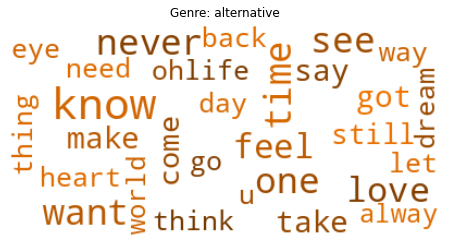

In [203]:
import matplotlib.pyplot as plt

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)


#wordcloud1 = WordCloud().generate(' '.join(comp1))

#plt.imshow(wordcloud1, interpolation='bilinear')
#plt.axis("off")

wordcloud1 = WordCloud(max_font_size=40, max_words=30, background_color='white', color_func=random_color_func ).generate(' '.join(comp1_s))
plt.figure(figsize=(10, 4))
plt.title("Genre: " + gen1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")

plt.show()


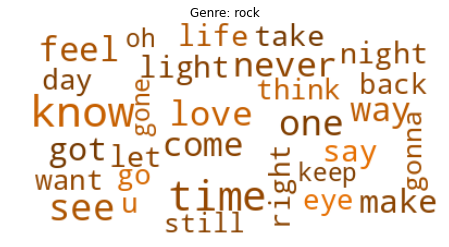

In [204]:
#wordcloud2 = WordCloud().generate(' '.join(comp2))

#plt.imshow(wordcloud1, interpolation='bilinear')
#plt.axis("off")

wordcloud2 = WordCloud(max_font_size=40, max_words=30, background_color='white', color_func=random_color_func ).generate(' '.join(comp2_s))
plt.figure(figsize=(10, 4))
plt.title("Genre: " + gen2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

plt.show()


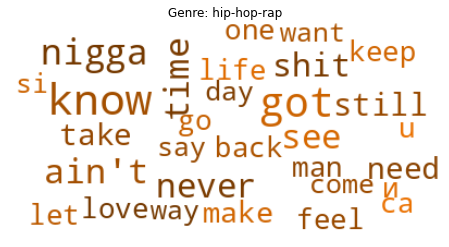

In [192]:
wordcloud3 = WordCloud(max_font_size=40, max_words=30, background_color='white', color_func=random_color_func ).generate(' '.join(comp3_s))
plt.figure(figsize=(10, 4))
plt.title("Genre: " + gen3)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")

plt.show()

In [121]:
comp1_df = 
df_stack=_stack(level=0)
counter-df_stack.value_counts()[0:10]
plt.bar(counter.index, counter.values)

NameError: name 'count_unique' is not defined

["i'm", 'like', 'know', 'time', "it's", 'got', 'see', "don't", "can't", 'get', 'one', 'never', 'feel', "i've", 'come', 'take', 'go', 'way', 'love', 'back', 'make', 'away', 'de', "you're", 'night', 'day', "there's", "i'll", 'right', 'say']


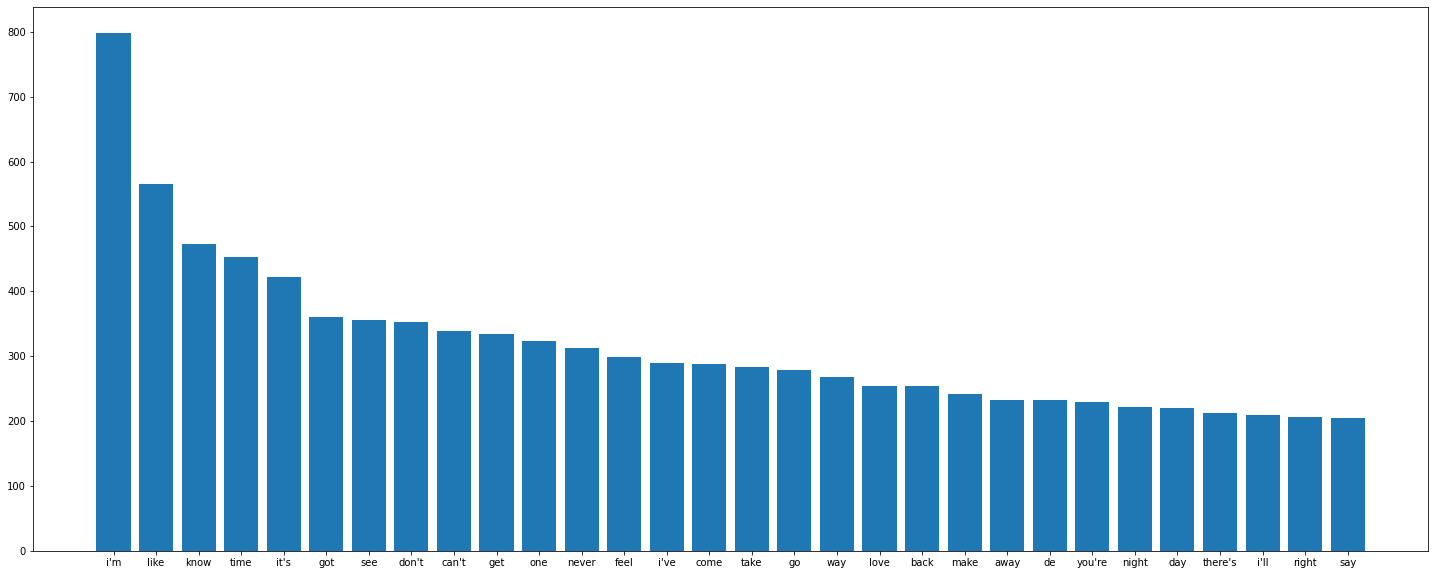

In [187]:
import collections

counter = collections.Counter(comp2_s)

top_ten = counter.most_common(30)

top_ten_index = []
top_ten_value = []

for index, value in top_ten:
    top_ten_index.append(index)
    top_ten_value.append(value)
print(top_ten_index)
plt.figure(figsize=(25,10))

plt.bar(top_ten_index,top_ten_value);
